In [57]:
import pandas as pd

# Load the dataset
OverseasResidentsDataPath = 'OverseasResidents_CleanedData.csv'  # Replace with your actual file path
TravelTrends_df = pd.read_csv(OverseasResidentsDataPath)
RegionBasedDataPath = 'RegionBased_TravelTrends.csv'
CountryBasedDataPath = 'CountryBasedUpdated_TravelTrends.csv'
RegionBasedTravelTrends_df = pd.read_csv(RegionBasedDataPath)
CountryBasedTravelTrends_df = pd.read_csv(CountryBasedDataPath)
TravelTrends_df.head()
# # Display data types and memory usage
# print("Data Types and Memory Usage:")
# print(TravelTrends_df.info())


,Period,Area of Residence,Total Visits,Total Spending in millions,Nights Spent,Purpose of Visit,Year,Visits by Purpose,Spending in millions,Number of visits by Air,Number of visits by Sea and Tunnel,Quarter
0,2019,North America,5373000,4918,36859000,Holiday - All,2019,2576000,2542,2041000,534000,0
1,2019,North America,5373000,4918,36859000,Holiday - Inclusive tour,2019,422000,494,297000,125000,0
2,2019,North America,5373000,4918,36859000,Business,2019,882000,1213,841000,41000,0
3,2019,North America,5373000,4918,36859000,Visit friends or relatives,2019,1391000,851,1313000,78000,0
4,2019,North America,5373000,4918,36859000,Miscellaneous,2019,524000,298,514000,10000,0


In [39]:
# Select only integer columns
int_columns = TravelTrends_df.select_dtypes(include=['int64'])

# Display summary statistics for integer columns only
print("\nSummary Statistics for Integer Columns:")
print(int_columns.describe())

# Check for missing values in integer columns only
print("\nMissing Values in Integer Columns:")
print(int_columns.isnull().sum())


Summary Statistics for Integer Columns:
       Total Visits  Total Spending in millions  Nights Spent         Year  \
count  1.050000e+03                 1050.000000  1.050000e+03  1050.000000   
mean   4.524240e+06                 3071.314286  3.415101e+07  2021.000000   
std    6.587085e+06                 4494.176250  4.488983e+07     1.414887   
min    3.100000e+04                   31.000000  1.398000e+06  2019.000000   
25%    7.460000e+05                  479.000000  8.055000e+06  2020.000000   
50%    2.063000e+06                 1818.000000  2.104900e+07  2021.000000   
75%    5.671000e+06                 3091.000000  3.655800e+07  2022.000000   
max    4.085700e+07                31075.000000  2.928700e+08  2023.000000   

       Visits by Purpose  Spending in millions  Number of visits by Air  \
count       1.050000e+03           1050.000000             1.050000e+03   
mean        1.541883e+06           1047.916190             1.187926e+06   
std         3.411932e+06       

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# Extract Year and Quarter from 'Period' if necessary
# Assuming 'Period' is something like '2019 Q1'
TravelTrends_df['Quarter'] = TravelTrends_df['Period'].apply(lambda x: '0' if len(x) == 4 else x[-2:])
TravelTrends_df['Year'] = TravelTrends_df['Period'].str[:4].astype(int)

TravelTrends_df.head()

# Save the updated data to a new CSV file
output_path = 'C://Users/vaibh/OneDrive/Desktop/BUSINESSPROJECT/OverseasResidents_CleanedData.csv'
TravelTrends_df.to_csv(output_path, index=False)

In [41]:
import plotly.express as px
TravelTrends_df['Period'] = TravelTrends_df['Period'].astype(str)
TravelTrends_df['Purpose of Visit'] = TravelTrends_df['Purpose of Visit'].astype(str)

# Filter the data to include only rows where 'Purpose of Visit' is 'All visits'
filtered_data = TravelTrends_df[TravelTrends_df['Purpose of Visit'] == 'All visits']
yearly_data = TravelTrends_df[TravelTrends_df['Quarter'] == '0']
# Create the interactive plot
fig = px.line(yearly_data, 
              x='Year', 
              y='Total Visits', 
               color='Area of Residence',
               title='Yearly Trends of Total Visits by Area of Residence',
               labels={'Total Visits': 'Total Visits', 'Year': 'Year'},
               color_discrete_sequence=px.colors.qualitative.Bold,  # High contrast colors
               height=400,  # Adjust the figure height
               width=500)  # Adjust the figure width

 # Set x-axis ticks to display only the years of interest
fig.update_layout(
     xaxis=dict(
         tickmode='array',
        tickvals=[2019, 2020, 2021, 2022, 2023],
        ticktext=['2019', '2020', '2021', '2022', '2023']
     )
 )

In [42]:
# Filter the data to include only rows where 'Purpose of Visit' is 'All visits' and Quarter is not 'Q0'
filtered_data = TravelTrends_df[(TravelTrends_df['Purpose of Visit'] == 'All visits') & (TravelTrends_df['Quarter'] != '0')]

# Combine Year and Quarter for a more meaningful x-axis label
filtered_data['Year_Quarter'] = filtered_data['Year'].astype(str) + ' ' + filtered_data['Quarter']
# Create the interactive plot
fig = px.line(filtered_data, 
              x='Year_Quarter', 
              y='Total Visits', 
              color='Area of Residence',
              title='Quarterly Trends of Total Visits by Area of Residence',
              labels={'Total Visits': 'Total Visits', 'Year_Quarter': 'Quarter'},
              color_discrete_sequence=px.colors.qualitative.Bold,  # High contrast colors
              height=400,  # Adjust the figure height
              width=500)  # Adjust the figure width

# Show the interactive plot
fig.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_7528\2303528840.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Filter the data to include only rows where 'Purpose of Visit' is 'All visits'
filtered_data = TravelTrends_df[TravelTrends_df['Purpose of Visit'] == 'All visits']

# Step 1: Yearly Trends for Spending in millions
yearly_data = filtered_data[filtered_data['Quarter'] == '0']

# Create the interactive plot for yearly spending
fig_yearly = px.line(yearly_data, 
                     x='Year', 
                     y='Spending in millions', 
                     color='Area of Residence',
                     title='Yearly Trends of Spending in Millions by AoR',
                     labels={'Spending in millions': 'Spending in Millions', 'Year': 'Year'},
                     color_discrete_sequence=px.colors.qualitative.Bold,  # High contrast colors
                     height=400,  # Adjust the figure height
                     width=500)  # Adjust the figure width

fig_yearly.show()

In [44]:
# Step 2: Quarterly Trends for Spending in millions
quarterly_data = filtered_data[filtered_data['Quarter'] != '0']

# Combine Year and Quarter for a more meaningful x-axis label
quarterly_data['Year_Quarter'] = quarterly_data['Year'].astype(str) + ' ' + quarterly_data['Quarter']

# Create the interactive plot for quarterly spending
fig_quarterly = px.line(quarterly_data, 
                        x='Year_Quarter', 
                        y='Spending in millions', 
                        color='Area of Residence',
                        title='Quarterly Trends of Spending in Millions by AoR',
                        labels={'Spending in millions': 'Spending in Millions', 'Year_Quarter': 'Quarter'},
                        color_discrete_sequence=px.colors.qualitative.Bold,  
                        height=400,  
                        width=500)  

fig_quarterly.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_7528\3726764654.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Step 1: Yearly Trends for Nights Spent
yearly_data = filtered_data[filtered_data['Quarter'] == '0']

# Create the interactive plot for yearly nights spent
fig_yearly = px.line(yearly_data, 
                     x='Year', 
                     y='Nights Spent', 
                     color='Area of Residence',
                     title='Yearly Trends of Nights Spent by Area of Residence',
                     labels={'Nights Spent': 'Nights Spent', 'Year': 'Year'},
                     color_discrete_sequence=px.colors.qualitative.Bold,  
                     height=400,  
                     width=500)  

fig_yearly.show()

In [46]:

# Step 2: Quarterly Trends for Nights Spent
quarterly_data = filtered_data[filtered_data['Quarter'] != '0']

# Combine Year and Quarter for a more meaningful x-axis label
quarterly_data['Year_Quarter'] = quarterly_data['Year'].astype(str) + ' ' + quarterly_data['Quarter']

# Create the interactive plot for quarterly nights spent
fig_quarterly = px.line(quarterly_data, 
                        x='Year_Quarter', 
                        y='Nights Spent', 
                        color='Area of Residence',
                        title='Quarterly Trends of Nights Spent by Area of Residence',
                        labels={'Nights Spent': 'Nights Spent', 'Year_Quarter': 'Quarter'},
                        color_discrete_sequence=px.colors.qualitative.Bold,  
                        height=400,  
                        width=500)  

fig_quarterly.show()

C:\Users\vaibh\AppData\Local\Temp\ipykernel_7528\2244813553.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
# Filter the data to exclude 'All visits'
filtered_data = TravelTrends_df[(TravelTrends_df['Purpose of Visit'] != 'All visits')]
filtered_data = filtered_data[(filtered_data['Area of Residence'] != 'World Total')]

# Group the data by Year, Area of Residence, and Purpose of Visit
grouped_data = filtered_data.groupby(['Year', 'Area of Residence', 'Purpose of Visit'])['Visits by Purpose'].sum().reset_index()

# Create a facet grid with line charts
fig = px.line(grouped_data, 
              x='Year', 
              y='Visits by Purpose', 
              color='Purpose of Visit',
              facet_col='Area of Residence',
              title='Yearly Visits by Purpose(in Millions) and Area of Residence',
              labels={'Visits by Purpose': 'Visits by Purpose(in M)', 'Year': 'Year'},
              height=500,  
              width=1650)  

# Show the interactive plot
fig.show()

In [48]:
# Filter the data for 'Holiday - All' and 'Business'
filtered_data = TravelTrends_df[TravelTrends_df['Purpose of Visit'].isin(['Holiday - All', 'Business'])]
filtered_data = filtered_data[(filtered_data['Area of Residence'] != 'World Total')]
# Group the data by Area of Residence and Purpose of Visit
grouped_data = filtered_data.groupby(['Area of Residence', 'Purpose of Visit'])['Visits by Purpose'].sum().reset_index()

# Create a sunburst chart
fig = px.sunburst(grouped_data, 
                  path=['Area of Residence', 'Purpose of Visit'], 
                  values='Visits by Purpose',
                  title='Sunburst Chart of Holiday - All and Business Visits by Area of Residence',
                  height=600,  
                  width=800)  

fig.show()

In [49]:

filtered_data = TravelTrends_df[(TravelTrends_df['Purpose of Visit'] != 'All visits')]
filtered_data = filtered_data[(filtered_data['Area of Residence'] != 'World Total')]
# Group the data by Year, Area of Residence, and Purpose of Visit
grouped_data = filtered_data.groupby(['Year', 'Area of Residence', 'Purpose of Visit'])['Spending in millions'].sum().reset_index()

# Create a facet grid with line charts for spendings
fig = px.line(grouped_data, 
              x='Year', 
              y='Spending in millions', 
              color='Purpose of Visit',
              facet_col='Area of Residence',
              title='Yearly Spending by Purpose and Area of Residence (Excluding All Visits)',
              labels={'Spending in millions': 'Spending in Millions', 'Year': 'Year'},
              height=400,  
              width=1600)  

# Show the interactive plot
fig.show()

In [50]:
# Group the data by Year and Area of Residence to sum the visits by Air and by Sea and Tunnel
filtered_data = TravelTrends_df[(TravelTrends_df['Area of Residence'] != 'World Total')]
grouped_data = filtered_data.groupby(['Year', 'Area of Residence'])[['Number of visits by Air', 'Number of visits by Sea and Tunnel']].sum().reset_index()


# Melt the data for easier plotting
melted_data = pd.melt(grouped_data, id_vars=['Year', 'Area of Residence'], 
                      value_vars=['Number of visits by Air', 'Number of visits by Sea and Tunnel'],
                      var_name='Mode of Transport', value_name='Number of Visits')

# Create the interactive line chart
fig = px.line(melted_data, 
              x='Year', 
              y='Number of Visits', 
              color='Mode of Transport',
              facet_col='Area of Residence',
              title='Number of Visits by Air and by Sea and Tunnel to the UK by Area of Residence',
              labels={'Number of Visits': 'Number of Visits', 'Year': 'Year'},
              height=400,  
              width=1600)  

# Show the interactive plot
fig.show()

In [51]:
# Total visits by region
visits_by_region = RegionBasedTravelTrends_df.groupby('Region of UK')['Visits by region of UK and area of residence'].sum().sort_values(ascending=False)
# Display the results
visits_by_region
# Total spendings by region
spendings_by_region = RegionBasedTravelTrends_df.groupby('Region of UK')['Spendings by region of UK and area of residence'].sum().sort_values(ascending=False)
# Display the results
spendings_by_region
# Total nights spent by region
nights_by_region = RegionBasedTravelTrends_df.groupby('Region of UK')['Nights Spent by region of UK and area of residence'].sum().sort_values(ascending=False)
# Display the results
nights_by_region
# Convert the nights spent values to integers
nights_by_region_int = nights_by_region.astype('int64')
nights_by_region_int

Region of UK
All Regions                 5845083000
Total England               4954317000
London                      2181223000
South East                   710464000
Scotland                     573126000
North West                   458981000
South West                   401746000
East of England              372913000
West Midlands                326674000
Yorkshire and the Humber     202961000
East Midlands                194820000
Wales                        130386000
North East                   102579000
Name: Nights Spent by region of UK and area of residence, dtype: int64

In [52]:
# Create a figure for visits
fig_visits = px.bar(
    x=visits_by_region.index,
    y=visits_by_region.values,
    labels={'x': 'Region of UK', 'y': 'Total Visits'},
    title='Total Visits by Region of UK'
)
fig_visits.update_traces(texttemplate='%{y}', textposition='outside')
fig_visits.update_layout(hovermode="x unified")

# Create a figure for spendings
fig_spendings = px.bar(
    x=spendings_by_region.index,
    y=spendings_by_region.values,
    labels={'x': 'Region of UK', 'y': 'Total Spendings (£ million)'},
    title='Total Spendings by Region of UK'
)
fig_spendings.update_traces(texttemplate='%{y}', textposition='outside')
fig_spendings.update_layout(hovermode="x unified")

# Create a figure for nights spent
fig_nights = px.bar(
    x=nights_by_region_int.index,
    y=nights_by_region_int.values,
    labels={'x': 'Region of UK', 'y': 'Total Nights Spent (billions)'},
    title='Total Nights Spent by Region of UK'
)
fig_nights.update_traces(texttemplate='%{y}', textposition='outside')
fig_nights.update_layout(hovermode="x unified")

# Display the interactive plots
fig_visits.show()
fig_spendings.show()
fig_nights.show()

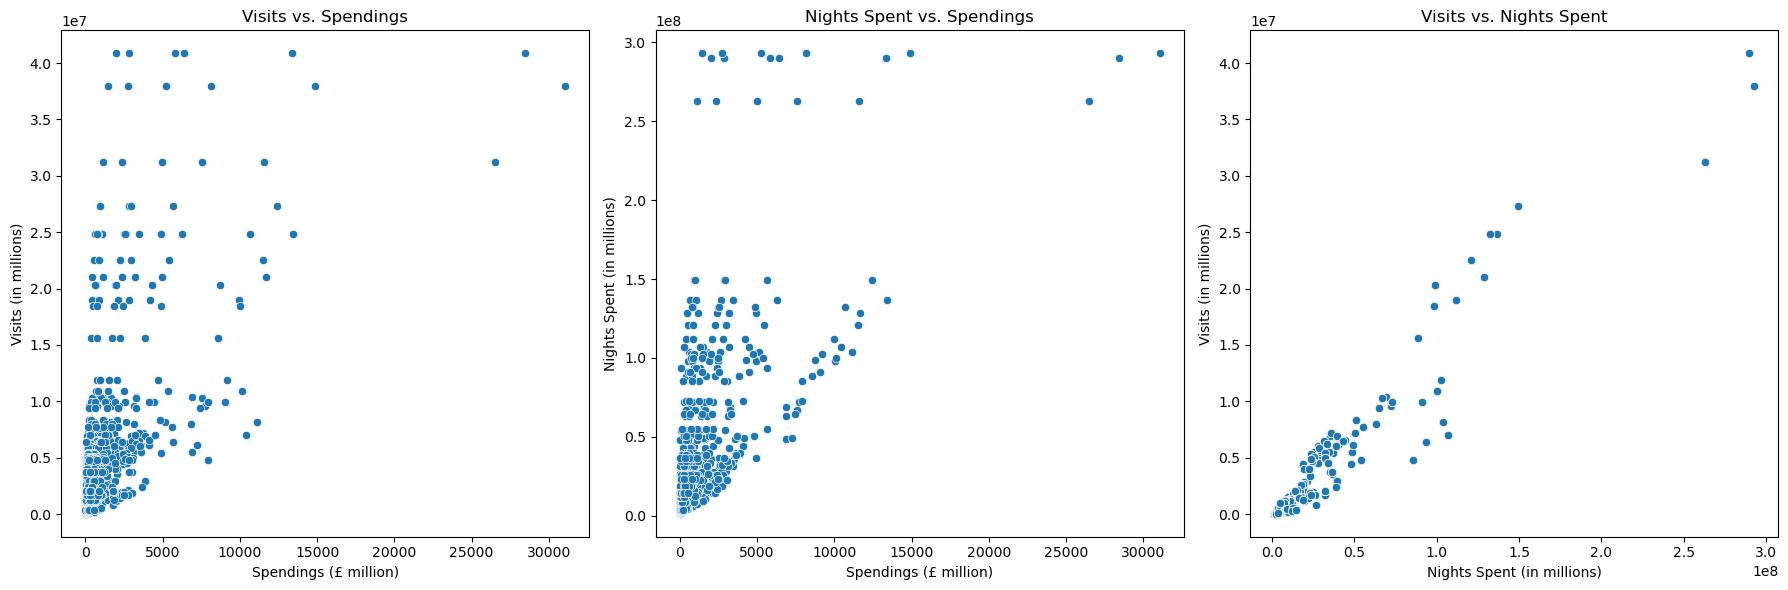

In [53]:
import plotly.graph_objs as go
import plotly.io as pio
# Set up the figure and axes for side-by-side plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for visits vs. spendings
sns.scatterplot(
    x='Spending in millions',
    y='Total Visits',
    data=TravelTrends_df,
    ax=axes[0]
)
axes[0].set_title('Visits vs. Spendings')
axes[0].set_xlabel('Spendings (£ million)')
axes[0].set_ylabel('Visits (in millions)')

# Scatter plot for nights spent vs. spendings
sns.scatterplot(
    x='Spending in millions',
    y='Nights Spent',
    data=TravelTrends_df,
    ax=axes[1]
)
axes[1].set_title('Nights Spent vs. Spendings')
axes[1].set_xlabel('Spendings (£ million)')
axes[1].set_ylabel('Nights Spent (in millions)')

# Scatter plot for visits vs. nights spent
sns.scatterplot(
    x='Nights Spent',
    y='Total Visits',
    data=TravelTrends_df,
    ax=axes[2]
)
axes[2].set_title('Visits vs. Nights Spent')
axes[2].set_xlabel('Nights Spent (in millions)')
axes[2].set_ylabel('Visits (in millions)')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
# Get basic information about the dataset
print(CountryBasedTravelTrends_df.info())

# Check for missing values
print(CountryBasedTravelTrends_df.isnull().sum())

# Get summary statistics of numerical columns
print(CountryBasedTravelTrends_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Area of Residence     1600 non-null   object
 1   Country               1600 non-null   object
 2   Year                  1600 non-null   object
 3   Visits by Country     1600 non-null   int64 
 4   Spendings by Country  1600 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 62.6+ KB
None
Area of Residence       0
Country                 0
Year                    0
Visits by Country       0
Spendings by Country    0
dtype: int64
       Visits by Country  Spendings by Country
count       1.600000e+03           1600.000000
mean        6.579619e+05            457.564375
std         2.627839e+06           1777.094690
min         0.000000e+00              0.000000
25%         9.000000e+03             10.750000
50%         5.700000e+04             51.000000
75%         2.33

                      Visits by Country  Spendings by Country
Visits by Country              1.000000              0.946492
Spendings by Country           0.946492              1.000000


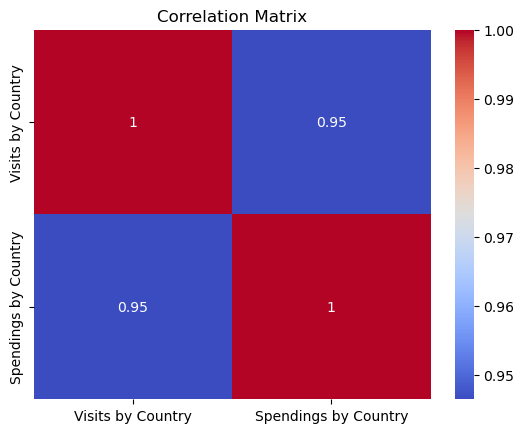

In [58]:
# Calculate the correlation matrix
correlation_matrix = CountryBasedTravelTrends_df[['Visits by Country','Spendings by Country']].corr()
print(correlation_matrix)

# Plot a heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Country
Total World              194625
Total Europe              86621
EU                        74111
Total Other Countries     66197
EU15                      62784
                          ...  
Sri Lanka                   150
Barbados                     99
Jamaica                      55
Tunisia                      49
Rest of the World            22
Name: Spendings by Country, Length: 64, dtype: int64


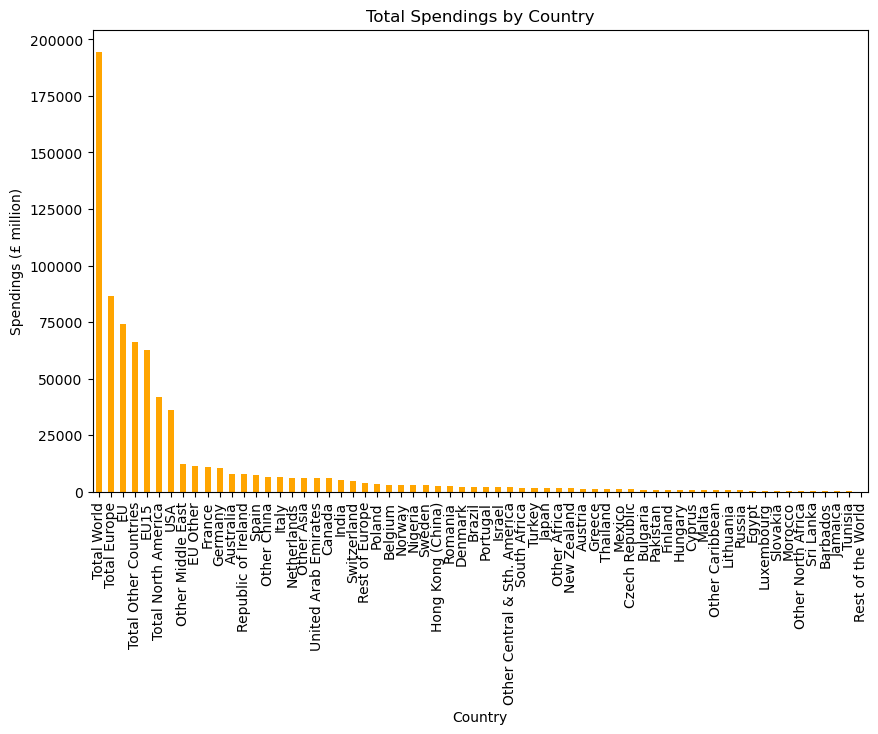

Country
Total World              245658000
Total Europe             165527000
EU                       150216000
EU15                     122905000
Total Other Countries     58353000
                           ...    
Sri Lanka                   117000
Barbados                    100000
Tunisia                      70000
Jamaica                      48000
Rest of the World            25000
Name: Visits by Country, Length: 64, dtype: int64


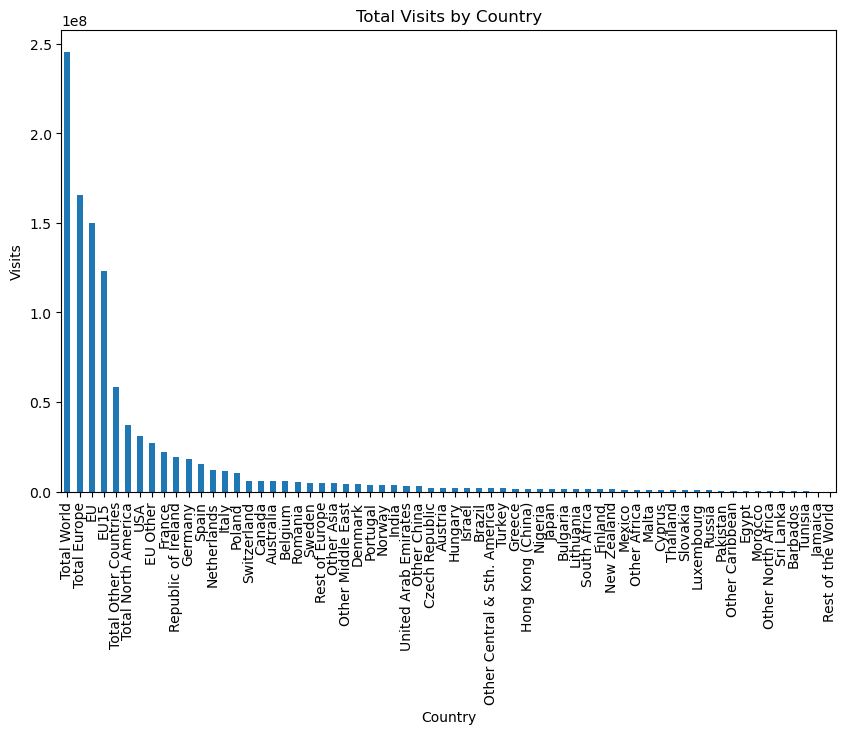

In [59]:
# Total spendings by country
total_spendings_by_country = CountryBasedTravelTrends_df.groupby('Country')['Spendings by Country'].sum().sort_values(ascending=False)
print(total_spendings_by_country)

# Plot spendings distribution
total_spendings_by_country.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Total Spendings by Country')
plt.ylabel('Spendings (£ million)')
plt.show()

# Total visits by country
total_visits_by_country = CountryBasedTravelTrends_df.groupby('Country')['Visits by Country'].sum().sort_values(ascending=False)
print(total_visits_by_country)

# Plot visits distribution (if you want to visualize)
import matplotlib.pyplot as plt
total_visits_by_country.plot(kind='bar', figsize=(10, 6))
plt.title('Total Visits by Country')
plt.ylabel('Visits')
plt.show()